In [1]:
import os

from dotenv import load_dotenv

import pandas as pd
import pandas_gbq
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings



from IPython.display import display

load_dotenv()
project_id = os.getenv("PROJECT_ID")

warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.filterwarnings("ignore", category=FutureWarning)

TOWERS = ["tower_A", "tower_B", "tower_C", "tower_D"]
METRIC = "pan_tilt_unit_command_elapsed_time"

**NOTE**: `pan_tilt_unit_command_elapsed_time` could not be profiled due to some data anomaly! Digging into this a little more below.

In [2]:
# Get data
df = pandas_gbq.read_gbq(
    f"select * from metrics.{METRIC}",
    project_id=project_id,
    use_bqstorage_api=True,
)

query = f"""
select
  ts,
  tower_id,
  metric_name,
  metric_value
from `raw_data.long_clean`
where metric_name = '{METRIC}'
"""
df_long_clean = pandas_gbq.read_gbq(
    query,
    project_id=project_id,
    use_bqstorage_api=True,
)

df.set_index("ts", inplace=True)
df.drop(columns=["timestamp_ms"], inplace=True)
df.sort_index(inplace=True)

Downloading: 100%|███████████████████████████████████████████████████████████████████████████████████████████|
Downloading: 100%|███████████████████████████████████████████████████████████████████████████████████████████|


In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 88339 entries, 2024-01-18 04:48:30+00:00 to 2024-02-17 20:57:30+00:00
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tower_A  0 non-null      float64
 1   tower_B  0 non-null      float64
 2   tower_C  0 non-null      float64
 3   tower_D  39237 non-null  float64
dtypes: float64(4)
memory usage: 3.4 MB


In [4]:
df.describe()

,tower_A,tower_B,tower_C,tower_D
count,0.0,0.0,0.0,3.923700e+04
mean,NaN,NaN,NaN,1.102072e+07
std,NaN,NaN,NaN,2.155029e+09
min,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,7.046980e-02
50%,NaN,NaN,NaN,9.858842e-02
75%,NaN,NaN,NaN,1.910357e-01
max,NaN,NaN,NaN,4.268390e+11


In [5]:
df['day'] = df.index.date
df_long = df.melt('day', TOWERS)
df.drop('day', axis=1, inplace=True)

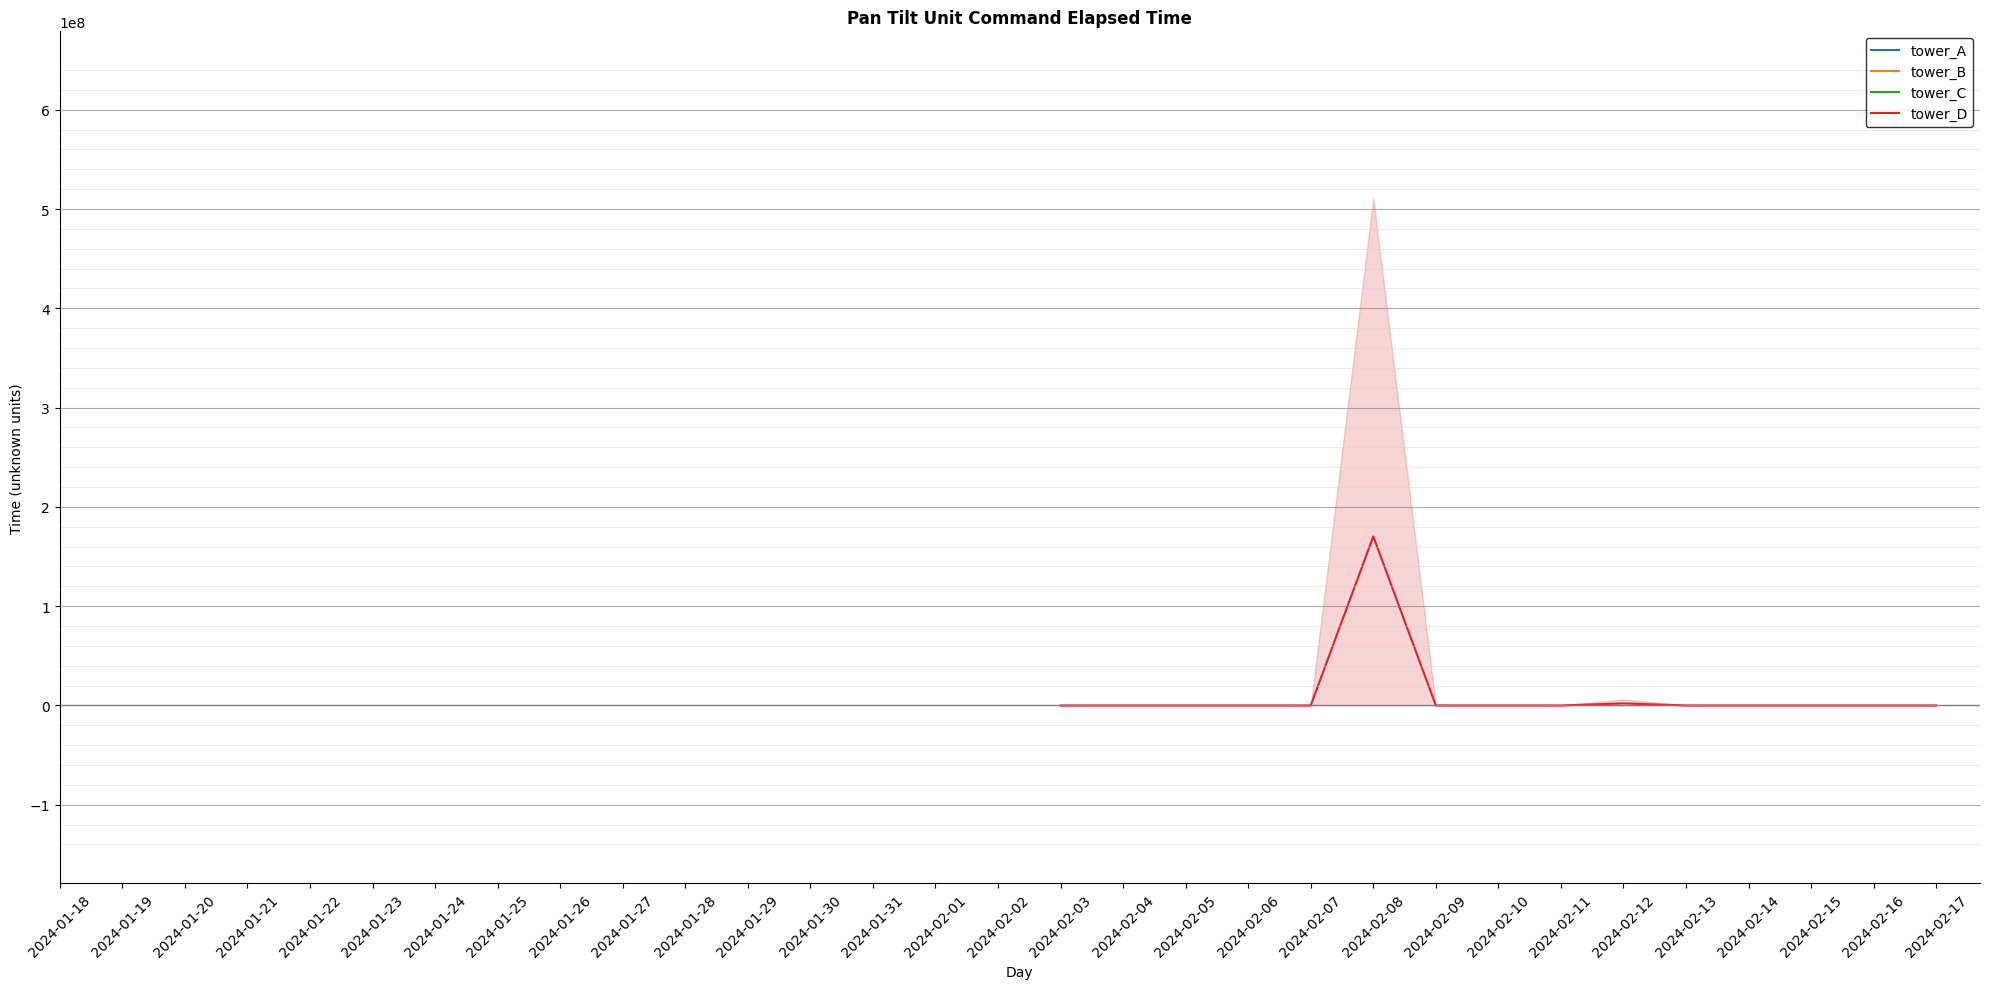

In [6]:
plt.figure(figsize=(20, 10))
ax = sns.lineplot(x='day', y='value', hue='variable', data=df_long)

ax.minorticks_on()
for y in ax.get_yticks():
    lw, a = (0.8, 0.65) if y != 0 else (1, 1)
    ax.axhline(y=y, color='grey', linestyle='-', linewidth=lw, alpha=a)
for y in ax.get_yticks(minor=True):
    ax.axhline(y=y, color='lightgrey', linestyle='-', linewidth=0.5, alpha=0.65)
ax.minorticks_off()

ax.set_xticks(x_values := df_long['day'].unique())
ax.set_xticklabels(x_values, rotation=45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=45)
plt.title('Pan Tilt Unit Command Elapsed Time', weight='bold')
plt.xlabel('Day')
plt.ylabel('Time (unknown units)')
plt.tight_layout()
plt.legend(title='Tower')
legend = plt.gca().legend().get_frame()
legend.set_linewidth(1)
legend.set_edgecolor('black')
plt.tight_layout()
plt.show()

In [7]:
df.resample('1d').agg(['mean', 'sem'])

tower_A     tower_B     tower_C           tower_D  \
                             mean sem    mean sem    mean sem          mean   
ts                                                                            
2024-01-18 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN           NaN   
2024-01-19 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN           NaN   
2024-01-20 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN           NaN   
2024-01-21 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN           NaN   
2024-01-22 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN           NaN   
2024-01-23 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN           NaN   
2024-01-24 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN           NaN   
2024-01-25 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN           NaN   
2024-01-26 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN           NaN   
2024-01-27 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN           NaN   
2024-01-28 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN           NaN   
2024-01-29 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN           NaN   
2024-01-30 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN           NaN   
2024-01-31 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN           NaN   
2024-02-01 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN           NaN   
2024-02-02 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN           NaN   
2024-02-03 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN  9.145092e-02   
2024-02-04 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN  9.070466e-02   
2024-02-05 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN  9.222950e-02   
2024-02-06 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN  8.902081e-02   
2024-02-07 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN  2.939798e-01   
2024-02-08 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN  1.702589e+08   
2024-02-09 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN  5.754202e-01   
2024-02-10 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN  5.670152e-01   
2024-02-11 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN  4.157834e-01   
2024-02-12 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN  2.047301e+06   
2024-02-13 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN  7.434121e-02   
2024-02-14 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN  9.260461e-02   
2024-02-15 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN  9.148311e-02   
2024-02-16 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN  8.965915e-02   
2024-02-17 00:00:00+00:00     NaN NaN     NaN NaN     NaN NaN  8.658805e-02   

                                         
                                    sem  
ts                                       
2024-01-18 00:00:00+00:00           NaN  
2024-01-19 00:00:00+00:00           NaN  
2024-01-20 00:00:00+00:00           NaN  
2024-01-21 00:00:00+00:00           NaN  
2024-01-22 00:00:00+00:00           NaN  
2024-01-23 00:00:00+00:00           NaN  
2024-01-24 00:00:00+00:00           NaN  
2024-01-25 00:00:00+00:00           NaN  
2024-01-26 00:00:00+00:00           NaN  
2024-01-27 00:00:00+00:00           NaN  
2024-01-28 00:00:00+00:00           NaN  
2024-01-29 00:00:00+00:00           NaN  
2024-01-30 00:00:00+00:00           NaN  
2024-01-31 00:00:00+00:00           NaN  
2024-02-01 00:00:00+00:00           NaN  
2024-02-02 00:00:00+00:00           NaN  
2024-02-03 00:00:00+00:00  1.289775e-03  
2024-02-04 00:00:00+00:00  7.688740e-04  
2024-02-05 00:00:00+00:00  7.086923e-04  
2024-02-06 00:00:00+00:00  6.602711e-04  
2024-02-07 00:00:00+00:00  8.039735e-03  
2024-02-08 00:00:00+00:00  1.702589e+08  
2024-02-09 00:00:00+00:00  8.896782e-03  
2024-02-10 00:00:00+00:00  8.908766e-03  
2024-02-11 00:00:00+00:00  6.722636e-03  
2024-02-12 00:00:00+00:00  2.047300e+06  
2024-02-13 00:00:00+00:00  6.220500e-04  
2024-02-14 00:00:00+00:00  9.534660e-04  
2024-02-15 00:00:00+00:00  6.702849e-